# <center>Unsupervised Learning<center>
    
###### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
import scipy.stats as stats

###### Read the data

In [3]:
df = pd.read_csv('Data/filled_train_28-03.csv')
df['Months_Since_Deliquency'] = df['Months_Since_Deliquency'].fillna(360)
df.head()

,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Home_Owner,Income_Verified,Purpose_Of_Loan,Gender,Months_Since_Deliquency,Interest_Rate
0,7000.0,0.0,68000.0,18.0,0.0,9.0,14.0,Rent,not verified,car,Female,360.0,1
1,30000.0,4.0,98367.0,15.0,0.0,12.0,24.0,Mortgage,VERIFIED - income,debt_consolidation,Female,17.0,3
2,24725.0,7.0,75566.0,16.0,0.0,12.0,16.0,Mortgage,VERIFIED - income,debt_consolidation,Male,360.0,3
3,17000.0,8.0,96000.0,22.0,1.0,19.0,30.0,Own,VERIFIED - income,debt_consolidation,Female,360.0,1
4,4500.0,2.0,30000.0,11.0,1.0,12.0,15.0,Rent,VERIFIED - income,credit_card,Male,360.0,3


In [4]:
df['Purpose_Of_Loan'].value_counts()

debt_consolidation    84501
credit_card           32206
home_improvement       7493
other                  7214
major_purchase         2940
small_business         1909
car                    1623
medical                1327
moving                  841
vacation                739
wedding                 707
house                   596
educational             104
renewable_energy         99
Name: Purpose_Of_Loan, dtype: int64

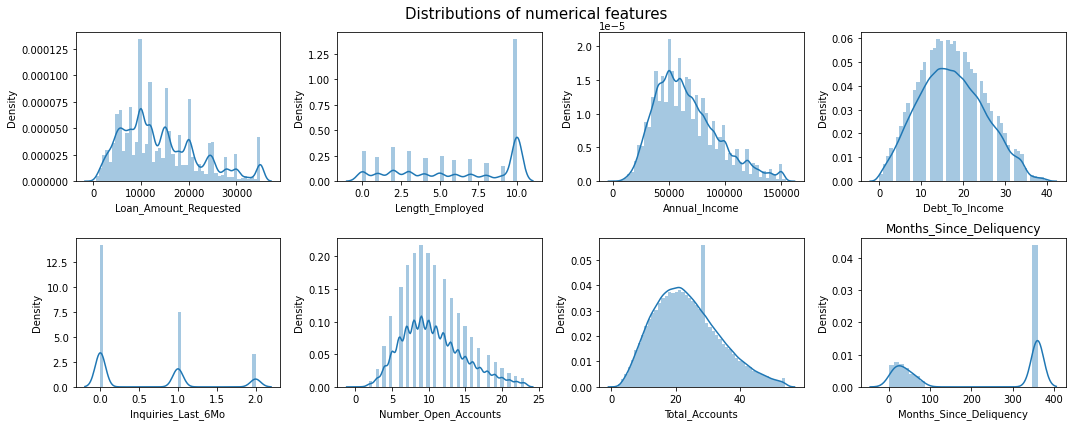

In [64]:
data_dist = df.select_dtypes(np.number).drop('Interest_Rate',axis = 1)
fig,ax = plt.subplots(nrows = 2,ncols = 4,figsize = (15,6))
for variables,plotsubs in zip(data_dist.columns,ax.flatten()):
    plt.title(variables)
    plotsubs.tick_params(labelsize = 10)
    plotsubs.set_xlabel(variables,fontsize = 10)
    sns.distplot(df[variables],ax = plotsubs)
    plt.tight_layout()
    plt.subplots_adjust(top = 0.92) 
fig.suptitle('Distributions of numerical features',fontsize = 15)
plt.show()

###### Making same transformations as in Classification notebook

In [65]:
data1 = df.copy()

In [66]:
data1['Loan_Amount_Requested'] = np.sqrt(data1['Loan_Amount_Requested'])
data1['Annual_Income'] = stats.boxcox(data1['Annual_Income'])[0]
data1['Number_Open_Accounts'] = np.sqrt(data1['Number_Open_Accounts'])
data1['Total_Accounts'] = np.sqrt(data1['Total_Accounts'])
data1['Months_Since_Deliquency'] = np.log(abs(df['Months_Since_Deliquency']-np.mean(df['Months_Since_Deliquency'])))
#Months_Since_Deliquency is sort of multi-modal

In [39]:
# def emp(x):
#     if x>=10:
#         return '10+yrs'
#     elif x>=6 and x<=9:
#         return '6-9 yrs'
#     elif x>=2 and x<=5:
#         return '2-5 yrs'
#     else:
#         return '0-1 yrs'

# data1['Length_Employed'] = data1['Length_Employed'].apply(emp)

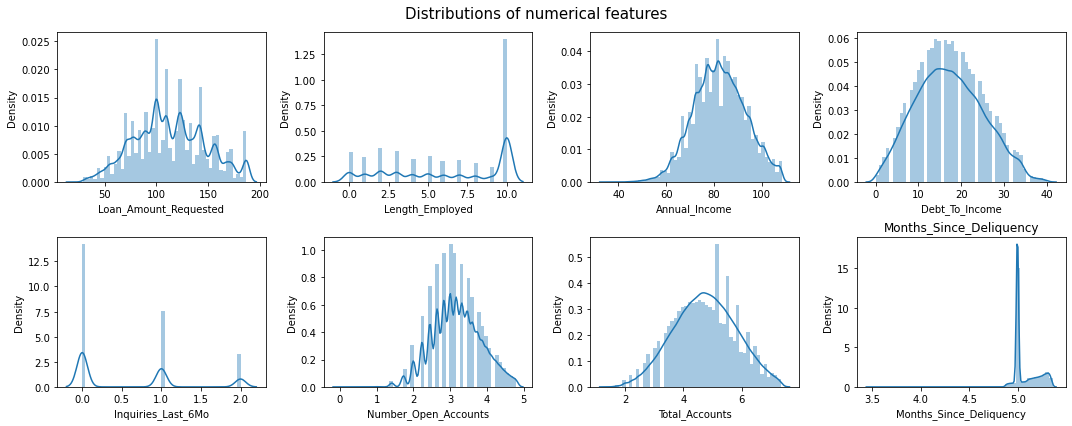

In [ ]:
data_dist = data1.select_dtypes(np.number).drop('Interest_Rate',axis = 1)
fig,ax = plt.subplots(nrows = 2,ncols = 4,figsize = (15,6))
for variables,plotsubs in zip(data_dist.columns,ax.flatten()):
    plt.title(variables)
    plotsubs.tick_params(labelsize = 10)
    plotsubs.set_xlabel(variables,fontsize = 10)
    sns.distplot(data_dist[variables],ax = plotsubs)
    plt.tight_layout()
    plt.subplots_adjust(top = 0.92) 
fig.suptitle('Distributions of numerical features',fontsize = 15)
plt.show()

In [67]:
#Instead of using OneHotEncoder, we will be using label encoder here since magnitude would not matter in USL
data1.drop('Interest_Rate',axis = 1,inplace = True)

In [68]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in data1.select_dtypes('object').columns:
    data1[i] = le.fit_transform(data1[i])

###### Standardizing the dataset

In [69]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data_scaled = pd.DataFrame(ss.fit_transform(data1),columns = data1.columns)

###### Data is now ready for applying Unsupervised learning techniques

###### K-Means Clustering

In [70]:
from sklearn.cluster import KMeans
wcv = []
for i in range(1,10):
    km = KMeans(n_clusters = i)
    km.fit(data_scaled)
    wcv.append(km.inertia_)

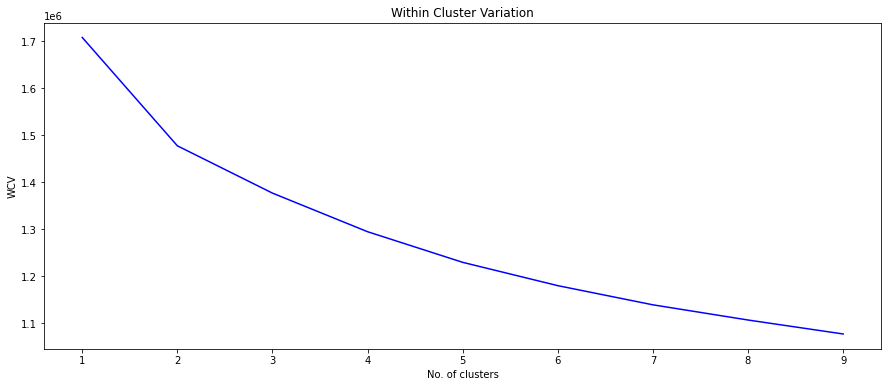

In [ ]:
plt.figure(figsize = (15,6))
plt.title('Within Cluster Variation')
plt.plot(range(1,10),wcv,color = 'b')
plt.xlabel('No. of clusters')
plt.ylabel('WCV')
plt.show()

In [ ]:
#Optimum number of clusters are 2,3 or 4. Since our dataset had 3 clusters in the begining we will be going with
#3 clusters.
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)
km.fit(data_scaled)
target1 = pd.Series(km.predict(data_scaled),name = 'Interest_Rate')

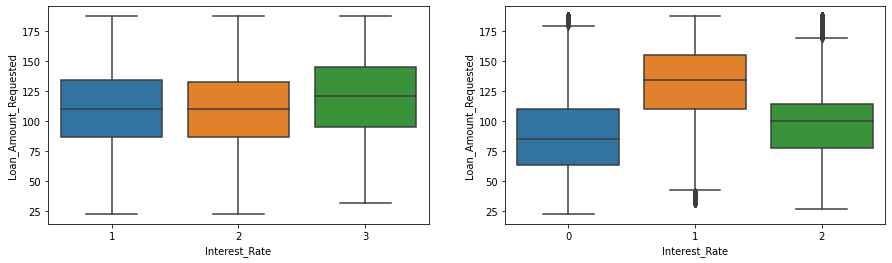

In [ ]:
fig,ax = plt.subplots(1,2,figsize = (15,4))
comp = 'Loan_Amount_Requested'
targ = 'Interest_Rate'
sns.boxplot(df[targ],data1[comp],ax = ax[0])
sns.boxplot(target1,data1[comp],ax = ax[1])
plt.show()

In [ ]:
df['Interest_Rate'].value_counts()

2    62405
3    49957
1    29937
Name: Interest_Rate, dtype: int64

In [ ]:
#Using loan amount requested to rename the predicted target
target1.value_counts()

1    68290
2    59513
0    14496
Name: Interest_Rate, dtype: int64

In [ ]:
target1.map({0:1,1:2,2:3}).value_counts()

2    68290
3    59513
1    14496
Name: Interest_Rate, dtype: int64

In [ ]:
df[df['Interest_Rate']==target1.map({0:1,1:2,2:3})].shape
#We see 48874 values that match with the original target variable. This could explain the low accuracy in the 
#classification models.

(48874, 13)

In [ ]:
target1 = target1.map({0:1,1:2,2:3})

###### Hierarchial Clustering

In [71]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

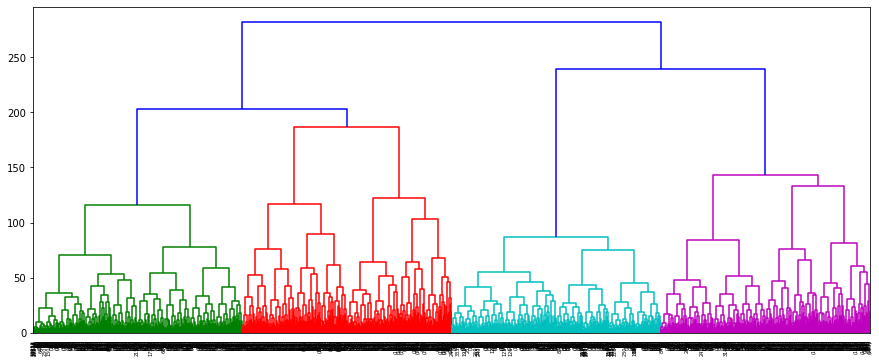

In [72]:
X_a = data_scaled.sample(35000)
plt.figure(figsize = (15,6))
sch.dendrogram(sch.linkage(X_a,'ward'),p = 10, truncate_mode = 'level')
plt.show()

###### Trying KMeans with PCA

In [73]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data_scaled)
len(np.cumsum(pca.explained_variance_ratio_)[np.cumsum(pca.explained_variance_ratio_)<=0.95])
#10 components tends to preserve 95% of variance

10

In [74]:
pca = PCA(n_components = 0.95)
X_pca = pca.fit_transform(data_scaled)

In [ ]:
from sklearn.cluster import KMeans
wcv = []
for i in range(1,10):
    km = KMeans(n_clusters = i)
    km.fit(X_pca)
    wcv.append(km.inertia_)

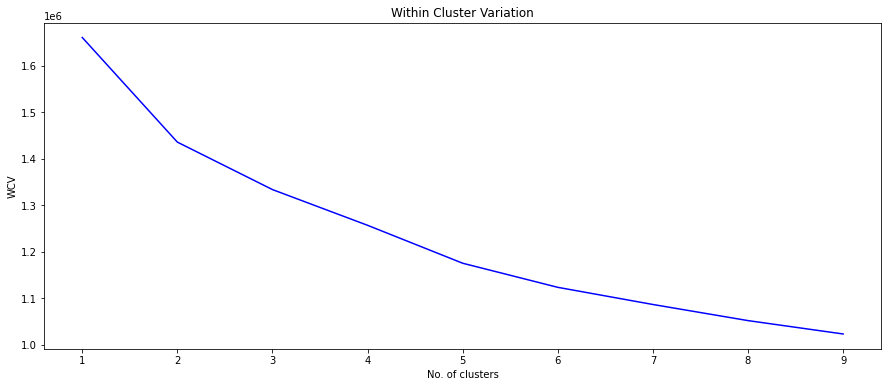

In [ ]:
plt.figure(figsize = (15,6))
plt.title('Within Cluster Variation')
plt.plot(range(1,10),wcv,color = 'b')
plt.xlabel('No. of clusters')
plt.ylabel('WCV')
plt.show()

In [ ]:
#Optimum number of clusters are 2,3 or 4. Since our dataset had 3 clusters in the begining we will be going with
#3 clusters.
km = KMeans(n_clusters = 3)
km.fit(X_pca)
target2 = pd.Series(km.predict(X_pca))

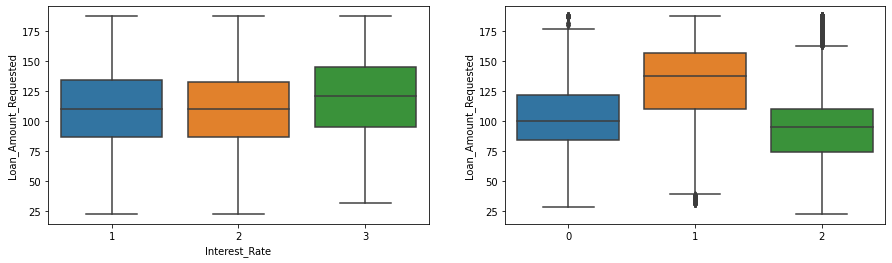

In [ ]:
fig,ax = plt.subplots(1,2,figsize = (15,4))
comp = 'Loan_Amount_Requested'
targ = 'Interest_Rate'
sns.boxplot(df[targ],data1[comp],ax = ax[0])
sns.boxplot(target2,data1[comp],ax = ax[1])
plt.show()

In [ ]:
#Using loan amount requested to rename the predicted target
target2.value_counts()

1    62784
2    46022
0    33493
dtype: int64

In [ ]:
df['Interest_Rate'].value_counts()

2    62405
3    49957
1    29937
Name: Interest_Rate, dtype: int64

In [ ]:
target2.map({0:1,1:2,2:3}).value_counts()

2    62784
3    46022
1    33493
dtype: int64

In [ ]:
df[df['Interest_Rate']==target2.map({0:1,1:2,2:3})].shape
#In case of PCA data, we see 52K targets that match with the original target. 
#This is better than before but still this is not great for our original target.

(52818, 13)

In [ ]:
target2 = pd.Series(target2.map({0:1,1:2,2:3}),name = 'Interest_Rate')

###### Hierarchial Clustering

In [75]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

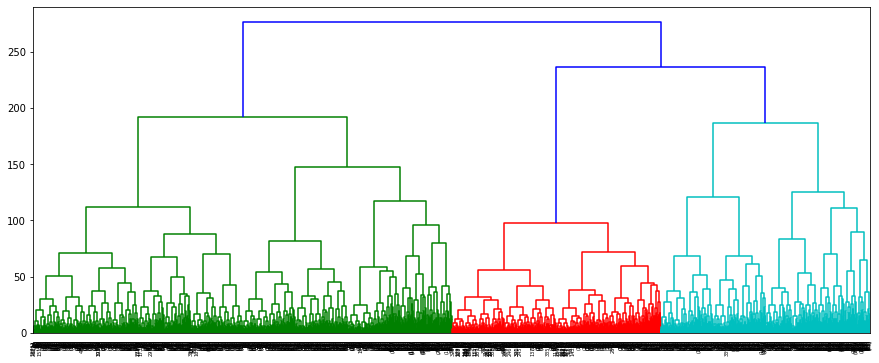

In [76]:
X_a_pca = pd.DataFrame(X_pca).sample(35000)
plt.figure(figsize = (15,6))
sch.dendrogram(sch.linkage(X_a_pca,'ward'),p = 10, truncate_mode = 'level')
plt.show()

###### Inference

* The mismatch in the original target variable and our created target variable could explain the underperformance of all ML algorithms in classification. Not reducing dimensions tends to better mimic the original target variable.

In [ ]:
df_class = pd.concat((data1,target2),axis = 1)

In [ ]:
df_class.to_csv('Data/clusters_obtained.csv',index = False)

# Applying Classification Algorithm the data with new target

In [2]:
# !unzip Data.zip

In [3]:
df = pd.read_csv('Data/clusters_obtained.csv')
df.head()

,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Home_Owner,Income_Verified,Purpose_Of_Loan,Gender,Months_Since_Deliquency,Interest_Rate
0,83.666003,0.0,84.824098,18.0,0.0,3.000000,3.741657,4,1,0,0,4.995113,3
1,173.205081,4.0,94.869560,15.0,0.0,3.464102,4.898979,0,0,2,0,5.274590,2
2,157.241852,7.0,87.584961,16.0,0.0,3.464102,4.000000,0,0,2,1,4.995113,2
3,130.384048,8.0,94.172943,22.0,1.0,4.358899,5.477226,3,0,2,0,4.995113,2
4,67.082039,2.0,66.067455,11.0,1.0,3.464102,3.872983,4,0,1,1,4.995113,3


###### Train_Test_Split

In [4]:
from sklearn.model_selection import train_test_split
X = df.drop('Interest_Rate',axis =1)
y = df['Interest_Rate']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)
np.mean(y_train),np.mean(y_test) #Train,test split is ok

(2.090715835522097, 2.077371749824315)

###### Standardizing for LogisticRegression

In [5]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_scaled = pd.DataFrame(ss.fit_transform(X),columns = X.columns)

X_train_s,X_test_s,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2,random_state = 1)
np.mean(y_train),np.mean(y_test) #Train,test split is ok

(2.090715835522097, 2.077371749824315)

###### Logistic Regression (Unscaled data)

In [80]:
#Applying logistic regression from sklearn
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

p_const = [1 if i<=1 else 2 if i>1 and i<=2.5 else 3 for i in pred]

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test,p_const))
#Immediately we see an improvement in accuracy to 69% as compared to 46% which we achieved from our base model

              precision    recall  f1-score   support

           1       0.98      0.16      0.27      6849
           2       0.59      0.96      0.73     12560
           3       0.93      0.71      0.81      9051

    accuracy                           0.69     28460
   macro avg       0.83      0.61      0.60     28460
weighted avg       0.79      0.69      0.64     28460



###### Logistic Regression (scaled data)

In [82]:
#Applying logistic regression from sklearn
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_s,y_train)
pred = lr.predict(X_test_s)

p_const_s = [1 if i<=1 else 2 if i>1 and i<=2.5 else 3 for i in pred]

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test,p_const_s))
#Immediately we see an improvement in accuracy to 69% as compared to 46% which we achieved from our base model

              precision    recall  f1-score   support

           1       0.98      0.16      0.27      6849
           2       0.59      0.96      0.73     12560
           3       0.93      0.71      0.81      9051

    accuracy                           0.69     28460
   macro avg       0.83      0.61      0.60     28460
weighted avg       0.79      0.69      0.64     28460



###### Initializing model_function

In [84]:
from sklearn.model_selection import cross_val_score

def model_function(estimator,X,y,n):
    
    f1 = cross_val_score(estimator,X,y,cv = 5,scoring = 'f1_weighted',n_jobs = -1)
    accuracy = cross_val_score(estimator,X,y,cv = 5,scoring = 'accuracy',n_jobs = -1)
    recall = cross_val_score(estimator,X,y,cv = 5,scoring = 'recall_weighted',n_jobs = -1)
    precision = cross_val_score(estimator,X,y,cv = 5,scoring = 'precision_weighted',n_jobs = -1)
    print('{} Models score computed'.format(n))
    return round(np.mean(f1),2),round(np.mean(accuracy),2),round(np.mean(recall),2),round(np.mean(precision),2),estimator

In [85]:
# !pip install catboost

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [87]:
f1_all = []
accuracy_all = []
recall_all = []
precision_all = []
model_name = []

In [88]:
#Creating a list with all models
dtc  =   DecisionTreeClassifier(random_state=5)
nb   =   MultinomialNB()
etc  =   ExtraTreesClassifier(random_state=5)
rfc  =   RandomForestClassifier(random_state=5)
gbc  =   GradientBoostingClassifier(random_state=5)
abc  =   AdaBoostClassifier(random_state=5)
lgbc =   LGBMClassifier(objective='multiclass', random_state=5,task_type = 'GPU')
xgbc =   XGBClassifier(random_state=5,task_type = 'GPU')
cbc  =   CatBoostClassifier(random_state = 5,task_type = 'GPU')

models = [dtc,nb,etc,rfc,gbc,abc,lgbc,xgbc,cbc]

###### Running all models to see which algorithm gives us good scores.

In [89]:
n = 1
for i in models:
    f1,accuracy,recall,precision,estimator = model_function(i,X,y,n)
    f1_all.append(f1)
    accuracy_all.append(accuracy)
    model_name.append(estimator)
    recall_all.append(recall)
    precision_all.append(precision)
    n+=1

1 Models score computed
2 Models score computed
3 Models score computed
4 Models score computed
5 Models score computed
6 Models score computed
7 Models score computed
8 Models score computed
9 Models score computed


In [91]:
model_metrics = pd.DataFrame({'Model':model_name,'Precision':precision_all,'Recall':recall_all,'F1 Score': f1_all,'Accuracy':accuracy_all})

In [93]:
#On our classified data, all algorithms seem to do very well.
model_metrics.sort_values('F1 Score',ascending = False)

,Model,Precision,Recall,F1 Score,Accuracy
8,<catboost.core.CatBoostClassifier object at 0x...,0.99,0.99,0.99,0.99
2,"ExtraTreesClassifier(bootstrap=False, ccp_alph...",0.97,0.97,0.97,0.97
3,"RandomForestClassifier(bootstrap=True, ccp_alp...",0.97,0.97,0.97,0.97
4,"GradientBoostingClassifier(ccp_alpha=0.0, crit...",0.97,0.97,0.97,0.97
7,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.97,0.97,0.97,0.97
0,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.94,0.94,0.94,0.94
5,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.93,0.93,0.93,0.93
1,"MultinomialNB(alpha=1.0, class_prior=None, fit...",0.72,0.72,0.72,0.72
6,"LGBMClassifier(boosting_type='gbdt', class_wei...",NaN,NaN,NaN,NaN


In [16]:
#Using Catboost since it gives us the best scores
cbc = CatBoostClassifier()
cbc.fit(X_train,y_train)

Learning rate set to 0.100738
0:	learn: 0.9524493	total: 75.6ms	remaining: 1m 15s
1:	learn: 0.8420026	total: 140ms	remaining: 1m 9s
2:	learn: 0.7530242	total: 209ms	remaining: 1m 9s
3:	learn: 0.6813398	total: 273ms	remaining: 1m 7s
4:	learn: 0.6206730	total: 341ms	remaining: 1m 7s
5:	learn: 0.5702266	total: 401ms	remaining: 1m 6s
6:	learn: 0.5262388	total: 472ms	remaining: 1m 7s
7:	learn: 0.4879733	total: 547ms	remaining: 1m 7s
8:	learn: 0.4545016	total: 616ms	remaining: 1m 7s
9:	learn: 0.4257314	total: 679ms	remaining: 1m 7s
10:	learn: 0.3988999	total: 754ms	remaining: 1m 7s
11:	learn: 0.3752800	total: 830ms	remaining: 1m 8s
12:	learn: 0.3540594	total: 912ms	remaining: 1m 9s
13:	learn: 0.3348530	total: 985ms	remaining: 1m 9s
14:	learn: 0.3172432	total: 1.05s	remaining: 1m 8s
15:	learn: 0.3012737	total: 1.11s	remaining: 1m 8s
16:	learn: 0.2866366	total: 1.18s	remaining: 1m 8s
17:	learn: 0.2745410	total: 1.24s	remaining: 1m 7s
18:	learn: 0.2627384	total: 1.3s	remaining: 1m 7s
19:	learn:

161:	learn: 0.0654000	total: 9.99s	remaining: 51.7s
162:	learn: 0.0651196	total: 10.1s	remaining: 51.6s
163:	learn: 0.0649259	total: 10.1s	remaining: 51.6s
164:	learn: 0.0647628	total: 10.2s	remaining: 51.5s
165:	learn: 0.0645676	total: 10.2s	remaining: 51.4s
166:	learn: 0.0644415	total: 10.3s	remaining: 51.3s
167:	learn: 0.0642133	total: 10.4s	remaining: 51.3s
168:	learn: 0.0640685	total: 10.4s	remaining: 51.2s
169:	learn: 0.0638152	total: 10.5s	remaining: 51.1s
170:	learn: 0.0636154	total: 10.5s	remaining: 51s
171:	learn: 0.0635003	total: 10.6s	remaining: 51s
172:	learn: 0.0632665	total: 10.7s	remaining: 51s
173:	learn: 0.0631520	total: 10.7s	remaining: 50.9s
174:	learn: 0.0630412	total: 10.8s	remaining: 50.7s
175:	learn: 0.0629134	total: 10.8s	remaining: 50.6s
176:	learn: 0.0627176	total: 10.9s	remaining: 50.6s
177:	learn: 0.0625541	total: 10.9s	remaining: 50.5s
178:	learn: 0.0623221	total: 11s	remaining: 50.4s
179:	learn: 0.0621411	total: 11s	remaining: 50.3s
180:	learn: 0.0619853	

322:	learn: 0.0449627	total: 19.4s	remaining: 40.7s
323:	learn: 0.0448760	total: 19.5s	remaining: 40.7s
324:	learn: 0.0447628	total: 19.6s	remaining: 40.6s
325:	learn: 0.0446998	total: 19.6s	remaining: 40.6s
326:	learn: 0.0446392	total: 19.7s	remaining: 40.5s
327:	learn: 0.0445279	total: 19.7s	remaining: 40.4s
328:	learn: 0.0444697	total: 19.8s	remaining: 40.4s
329:	learn: 0.0443986	total: 19.8s	remaining: 40.3s
330:	learn: 0.0443532	total: 19.9s	remaining: 40.2s
331:	learn: 0.0442701	total: 20s	remaining: 40.2s
332:	learn: 0.0442155	total: 20s	remaining: 40.1s
333:	learn: 0.0441649	total: 20.1s	remaining: 40s
334:	learn: 0.0440932	total: 20.1s	remaining: 40s
335:	learn: 0.0440535	total: 20.2s	remaining: 39.9s
336:	learn: 0.0439613	total: 20.3s	remaining: 39.8s
337:	learn: 0.0438748	total: 20.3s	remaining: 39.8s
338:	learn: 0.0437844	total: 20.4s	remaining: 39.7s
339:	learn: 0.0437198	total: 20.4s	remaining: 39.7s
340:	learn: 0.0436710	total: 20.5s	remaining: 39.6s
341:	learn: 0.043620

482:	learn: 0.0355591	total: 28.9s	remaining: 30.9s
483:	learn: 0.0355195	total: 28.9s	remaining: 30.8s
484:	learn: 0.0354824	total: 29s	remaining: 30.8s
485:	learn: 0.0354272	total: 29s	remaining: 30.7s
486:	learn: 0.0353950	total: 29.1s	remaining: 30.7s
487:	learn: 0.0353344	total: 29.2s	remaining: 30.6s
488:	learn: 0.0352942	total: 29.2s	remaining: 30.6s
489:	learn: 0.0352492	total: 29.3s	remaining: 30.5s
490:	learn: 0.0352221	total: 29.4s	remaining: 30.4s
491:	learn: 0.0351874	total: 29.4s	remaining: 30.4s
492:	learn: 0.0351563	total: 29.5s	remaining: 30.3s
493:	learn: 0.0350872	total: 29.5s	remaining: 30.2s
494:	learn: 0.0350584	total: 29.6s	remaining: 30.2s
495:	learn: 0.0350300	total: 29.6s	remaining: 30.1s
496:	learn: 0.0349797	total: 29.7s	remaining: 30.1s
497:	learn: 0.0349532	total: 29.7s	remaining: 30s
498:	learn: 0.0349185	total: 29.8s	remaining: 29.9s
499:	learn: 0.0348851	total: 29.9s	remaining: 29.9s
500:	learn: 0.0348243	total: 29.9s	remaining: 29.8s
501:	learn: 0.0347

643:	learn: 0.0296307	total: 38.4s	remaining: 21.2s
644:	learn: 0.0296036	total: 38.4s	remaining: 21.1s
645:	learn: 0.0295764	total: 38.5s	remaining: 21.1s
646:	learn: 0.0295472	total: 38.5s	remaining: 21s
647:	learn: 0.0295204	total: 38.6s	remaining: 21s
648:	learn: 0.0294959	total: 38.6s	remaining: 20.9s
649:	learn: 0.0294660	total: 38.7s	remaining: 20.8s
650:	learn: 0.0294312	total: 38.7s	remaining: 20.8s
651:	learn: 0.0294028	total: 38.8s	remaining: 20.7s
652:	learn: 0.0293626	total: 38.9s	remaining: 20.7s
653:	learn: 0.0293383	total: 38.9s	remaining: 20.6s
654:	learn: 0.0293098	total: 39s	remaining: 20.5s
655:	learn: 0.0292678	total: 39s	remaining: 20.5s
656:	learn: 0.0292299	total: 39.1s	remaining: 20.4s
657:	learn: 0.0292096	total: 39.2s	remaining: 20.4s
658:	learn: 0.0291816	total: 39.2s	remaining: 20.3s
659:	learn: 0.0291631	total: 39.3s	remaining: 20.2s
660:	learn: 0.0291435	total: 39.3s	remaining: 20.2s
661:	learn: 0.0291122	total: 39.4s	remaining: 20.1s
662:	learn: 0.029085

804:	learn: 0.0256675	total: 47.7s	remaining: 11.6s
805:	learn: 0.0256520	total: 47.8s	remaining: 11.5s
806:	learn: 0.0256293	total: 47.8s	remaining: 11.4s
807:	learn: 0.0256118	total: 47.9s	remaining: 11.4s
808:	learn: 0.0255826	total: 48s	remaining: 11.3s
809:	learn: 0.0255468	total: 48s	remaining: 11.3s
810:	learn: 0.0255287	total: 48.1s	remaining: 11.2s
811:	learn: 0.0255120	total: 48.1s	remaining: 11.1s
812:	learn: 0.0254947	total: 48.2s	remaining: 11.1s
813:	learn: 0.0254765	total: 48.2s	remaining: 11s
814:	learn: 0.0254514	total: 48.3s	remaining: 11s
815:	learn: 0.0254314	total: 48.4s	remaining: 10.9s
816:	learn: 0.0254063	total: 48.4s	remaining: 10.8s
817:	learn: 0.0253888	total: 48.5s	remaining: 10.8s
818:	learn: 0.0253639	total: 48.5s	remaining: 10.7s
819:	learn: 0.0253480	total: 48.6s	remaining: 10.7s
820:	learn: 0.0253240	total: 48.7s	remaining: 10.6s
821:	learn: 0.0253046	total: 48.7s	remaining: 10.6s
822:	learn: 0.0252777	total: 48.8s	remaining: 10.5s
823:	learn: 0.025258

965:	learn: 0.0225716	total: 57.2s	remaining: 2.01s
966:	learn: 0.0225505	total: 57.3s	remaining: 1.95s
967:	learn: 0.0225359	total: 57.3s	remaining: 1.89s
968:	learn: 0.0225247	total: 57.4s	remaining: 1.83s
969:	learn: 0.0225134	total: 57.4s	remaining: 1.78s
970:	learn: 0.0224948	total: 57.5s	remaining: 1.72s
971:	learn: 0.0224807	total: 57.6s	remaining: 1.66s
972:	learn: 0.0224602	total: 57.6s	remaining: 1.6s
973:	learn: 0.0224459	total: 57.7s	remaining: 1.54s
974:	learn: 0.0224278	total: 57.8s	remaining: 1.48s
975:	learn: 0.0224137	total: 57.8s	remaining: 1.42s
976:	learn: 0.0224036	total: 57.9s	remaining: 1.36s
977:	learn: 0.0223900	total: 57.9s	remaining: 1.3s
978:	learn: 0.0223786	total: 58s	remaining: 1.24s
979:	learn: 0.0223664	total: 58.1s	remaining: 1.18s
980:	learn: 0.0223497	total: 58.1s	remaining: 1.13s
981:	learn: 0.0223346	total: 58.2s	remaining: 1.07s
982:	learn: 0.0223184	total: 58.2s	remaining: 1.01s
983:	learn: 0.0223017	total: 58.3s	remaining: 948ms
984:	learn: 0.02

In [17]:
import pickle
pickle.dump(cbc,open('models/loan_interest_prediction.sav','wb'))

In [11]:
from sklearn.metrics import classification_report,confusion_matrix
cpred = cbc.predict(X_test)
print(classification_report(y_test,cpred))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99      6849
           2       0.99      0.99      0.99     12560
           3       0.99      0.99      0.99      9051

    accuracy                           0.99     28460
   macro avg       0.99      0.99      0.99     28460
weighted avg       0.99      0.99      0.99     28460



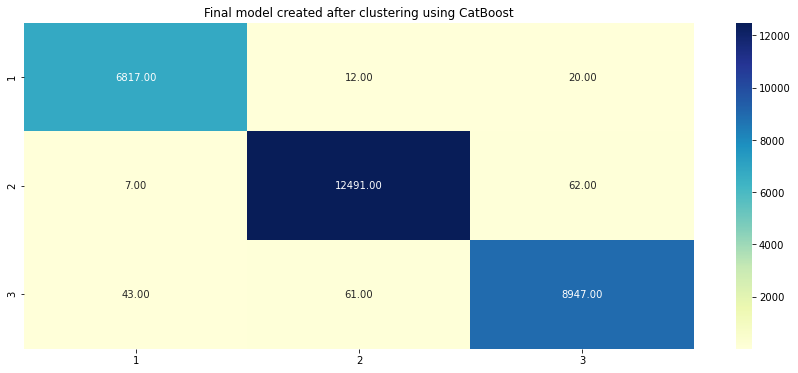

In [29]:
plt.figure(figsize = (15,6))
sns.heatmap(confusion_matrix(y_test,cpred),annot = True,fmt = '.2f',cmap = 'YlGnBu')
plt.title('Final model created after clustering using CatBoost')
plt.xticks([0.5,1.5,2.5],[1,2,3])
plt.yticks([0.5,1.5,2.5],[1,2,3])
plt.show()

# Notebook Summary

###### Converting all categorical columns to numerical

since we are performing unsupervised learning here we are using LabelEncoder as the clusters would get created accordingly and effect of magnitude will not be as bad as it is when we are applying traditional classification algorithms.


###### Applying standardization 

Standardization was applied to data points since we are using K-Means which is a distance based or centroid based algorithm.

###### Applying PCA to get optimal dimensions that preserve 95% of variance and improve overall accuracy.

Using the explained_variance_ratio, we found 10 components to be adequate to preserve 95% of variance present in the dataset. 

###### Using Within Cluster Variation (WCV) to find appropriate number of clusters for the dataset.

WCV gives us optimal cluster values of 2,3 and 4.

###### Using dendrogram to confirm whether optimal number of clusters match with WCV

Dendrogram on PCA data shows us 3 clusters which is what we are looking for, for an ideal comparison with the original target variable. Dendrogram was run on a sample of 35000 observations present in the dataset since we were running into memory errors. 

###### Created clusters vs target variable

We observe that 48874 values in our original target match with our new target variable. % of data matching = 34% approx. This is very low for us to be able to create a highly accurate model from our original target set. This could be a reason for the low accuracy we are seeing in our data.

###### New accuracy obtained after using target as clusters created by us

|Model| 	Precision| 	Recall| 	F1 Score| 	Accuracy|
|---|---|---|---|---|
| 	CatboostClassifier| 	0.99| 	0.99| 	0.99| 	0.99|
| 	ExtraTreesClassifier| 	0.97| 	0.97| 	0.97|	0.97|
| 	RandomForestClassifier| 	0.97| 	0.97| 	0.97| 	0.97|
| 	GradientBoostingClassifier| 	0.97| 	0.97| 	0.97| 	0.97|
| 	XGBClassifier| 	0.97| 	0.97| 	0.97| 	0.97|
| 	DecisionTreeClassifier| 	0.94| 	0.94| 	0.94| 	0.94|
| 	AdaBoostClassifier| 	0.93| 	0.93| 	0.93| 	0.93|
| 	MultinomialNB| 	0.72| 	0.72| 	0.72| 	0.72|

**After clustering and creating ML models on the new target, we can clearly see a massive improvement in model performance. It seems like there must have been some more parameters that have determined our original target variable that was not provided to us within our dataset.**

In [25]:
df['Interest_Rate'].value_counts()

2    62784
3    46022
1    33493
Name: Interest_Rate, dtype: int64

In [7]:
48874/142299

0.3434598978207858